In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
gpt4 = pd.read_csv('../generation/answers/zero-shot_gpt-4-0125-preview.csv')
mixtral = pd.read_csv('../generation/answers/zero-shot_mixtral.csv')
melm = pd.read_csv('../generation/answers/zero-shot_melm.csv')
survey = pd.read_csv('../data/survey_responses_mapped.csv')


In [3]:
# Add an identifier column to each dataset
gpt4['Dataset'] = 'GPT-4'
mixtral['Dataset'] = 'Mixtral'
melm['Dataset'] = 'MechGPT'
survey['Dataset'] = 'Survey'

# Combine the datasets
combined_df = pd.concat([survey, gpt4, mixtral, melm])

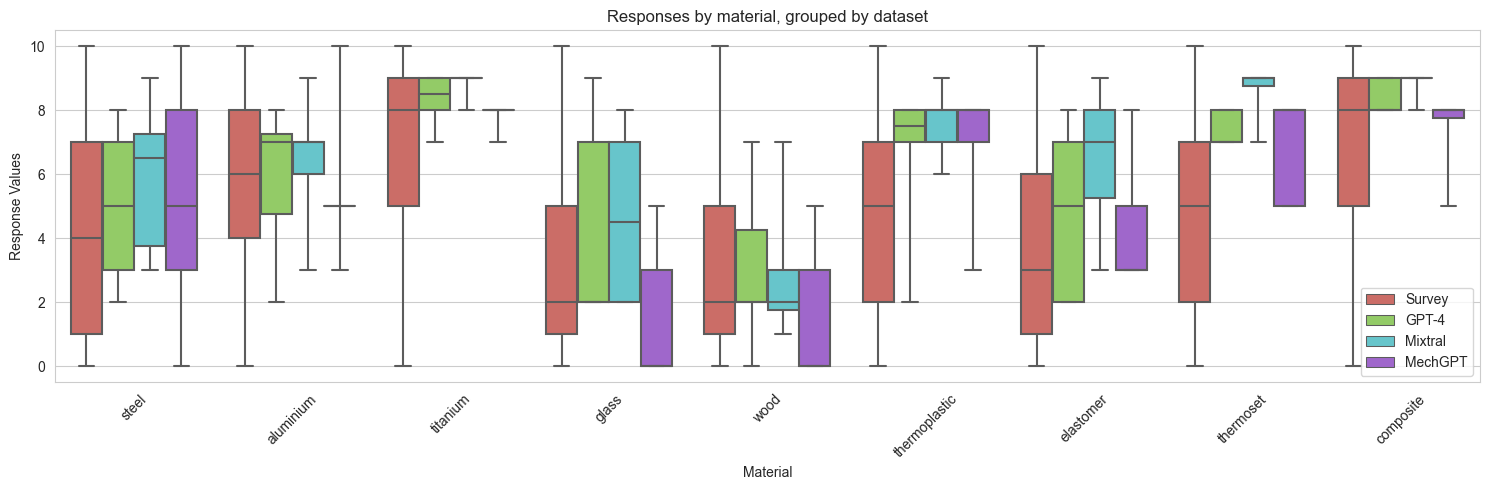

In [4]:
# Recreate the box and whisker plot with updated dataset names and excluding outliers
plt.figure(figsize=(15, 5))
sns.boxplot(data=combined_df, x='material', y='response', hue='Dataset',
            palette='hls',
            showfliers=False,
            whis=(0, 100))

plt.title('Responses by material, grouped by dataset')
plt.ylabel('Response Values')
plt.xlabel('Material')
plt.legend(title='Dataset')
plt.xticks(rotation=45)
#specify legend location
plt.legend(loc='lower right')
# save figure without cropping the labels
plt.tight_layout()
plt.savefig('figures/responses_by_material_grouped_by_dataset.pdf')
plt.show()

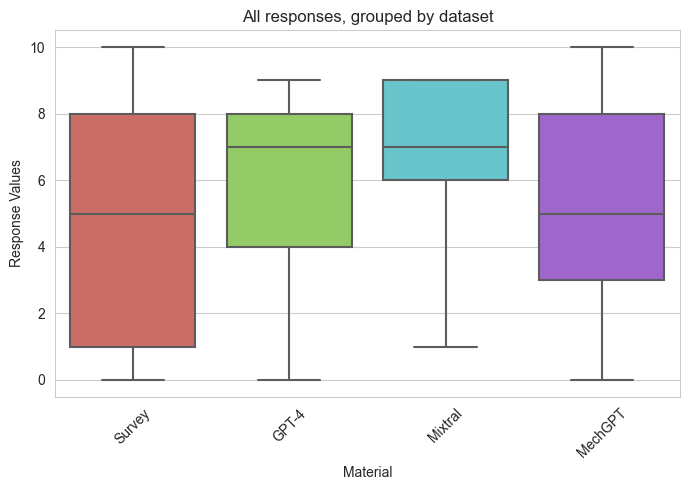

In [66]:
# Recreate the box and whisker plot with updated dataset names and excluding outliers
plt.figure(figsize=(7, 5))
sns.boxplot(data=combined_df, x='Dataset', y='response',
            palette='hls',
            showfliers=False,
            whis=(0, 100))

plt.title('All responses, grouped by dataset')
plt.ylabel('Response Values')
plt.xlabel('Material')
# plt.legend(title='Dataset')
plt.xticks(rotation=45)
#specify legend location
# plt.legend(loc='lower right')
# save figure without cropping the labels
plt.tight_layout()
plt.savefig('figures/responses_grouped_by_dataset.pdf')
plt.show()

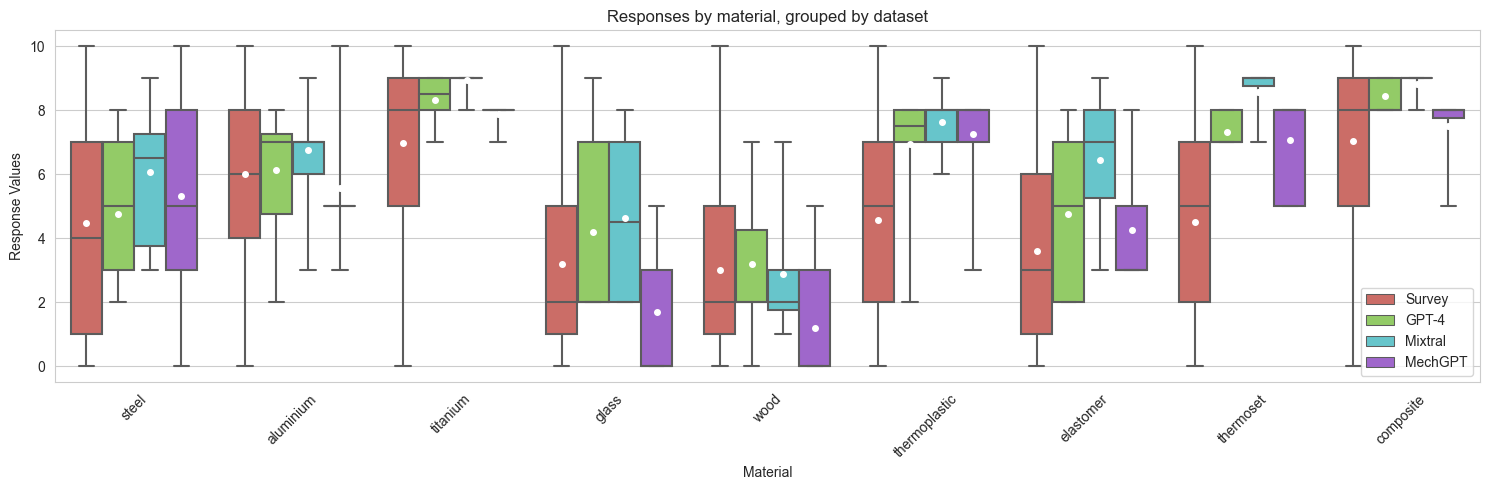

In [130]:
# Recreate the box and whisker plot with updated dataset names and excluding outliers
plt.figure(figsize=(15, 5))
sns.boxplot(data=combined_df, x='material', y='response', hue='Dataset',
            palette='hls', showmeans=True,
            meanprops={'marker':'o',
                       'markerfacecolor':'white',
                       'markeredgecolor':'white',
                       'markersize':'4'}, whis=(0, 100),
             showfliers=False)

plt.title('Responses by material, grouped by dataset')
plt.ylabel('Response Values')
plt.xlabel('Material')
plt.legend(title='Dataset')
plt.xticks(rotation=45)
#specify legend location
plt.legend(loc='lower right')
# save figure without cropping the labels
plt.tight_layout()
# plt.savefig('responses_by_material_grouped_by_dataset.pdf')
plt.show()


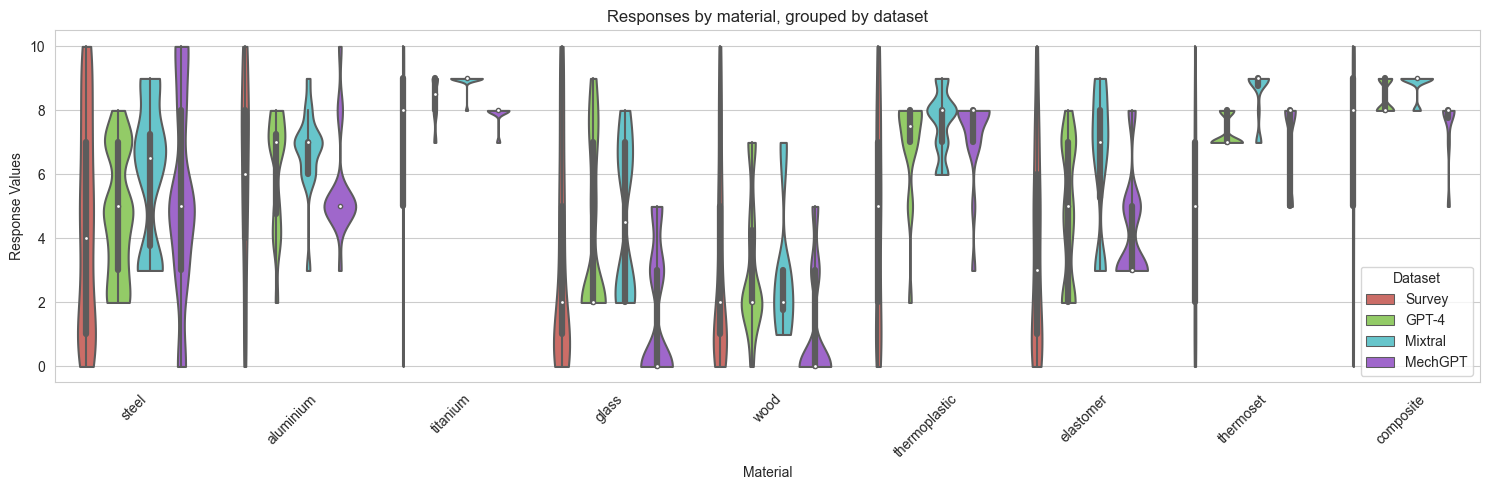

In [131]:
# make a violin plot
plt.figure(figsize=(15, 5))
sns.violinplot(data=combined_df, x='material', y='response', hue='Dataset',
               palette='hls', cut=0, bw=0.3)
plt.title('Responses by material, grouped by dataset')
plt.ylabel('Response Values')
plt.xlabel('Material')
plt.legend(title='Dataset')
plt.xticks(rotation=45)
# save figure without cropping the labels
plt.tight_layout()
plt.savefig('figures/responses_by_material_grouped_by_dataset-violin.pdf')
plt.show()

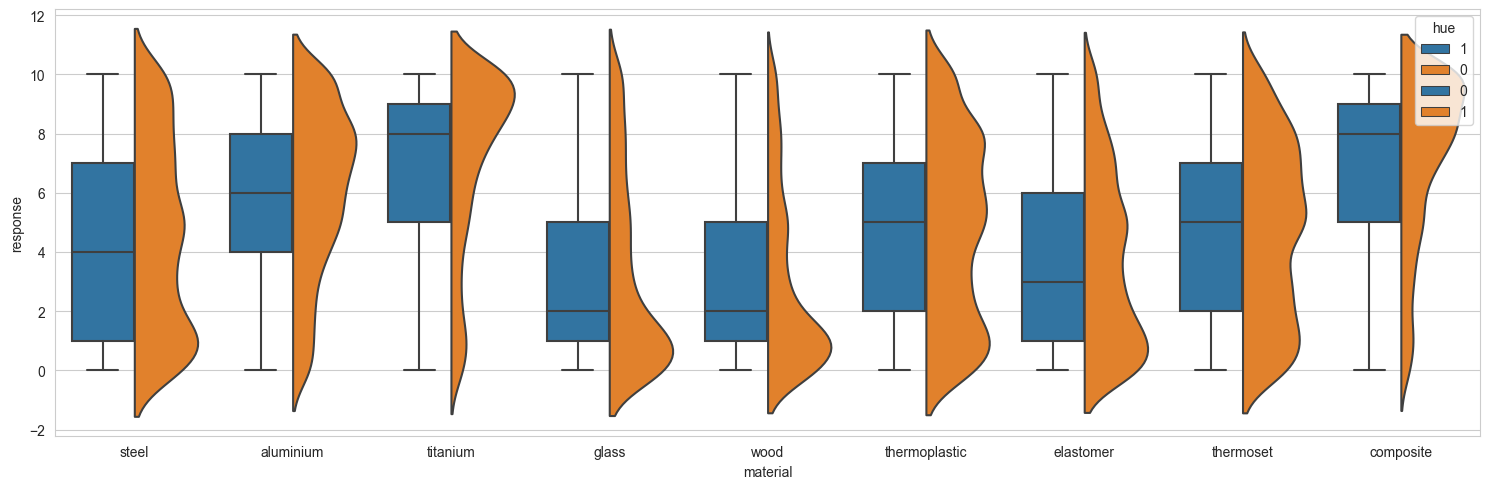

In [101]:
# make a violin plot
plt.figure(figsize=(15, 5))
combined_df2 = combined_df.assign(hue=1)

sns.boxplot(data=combined_df2, x='material', y="response", hue="hue", hue_order=[1,0])

g = sns.violinplot(data=combined_df2, x='material', y='response', hue="hue", split=True, hue_order=[0,1])
# g.title('Responses by material, grouped by dataset')
# g.ylabel('Response Values')
# g.xlabel('Material')
# g.legend(title='Dataset')
# g.xticks(rotation=45)
# save figure without cropping the labels
plt.tight_layout()
# plt.savefig('responses_by_material_grouped_by_dataset-violin.pdf')
# g.show()


## Parallel results

6051


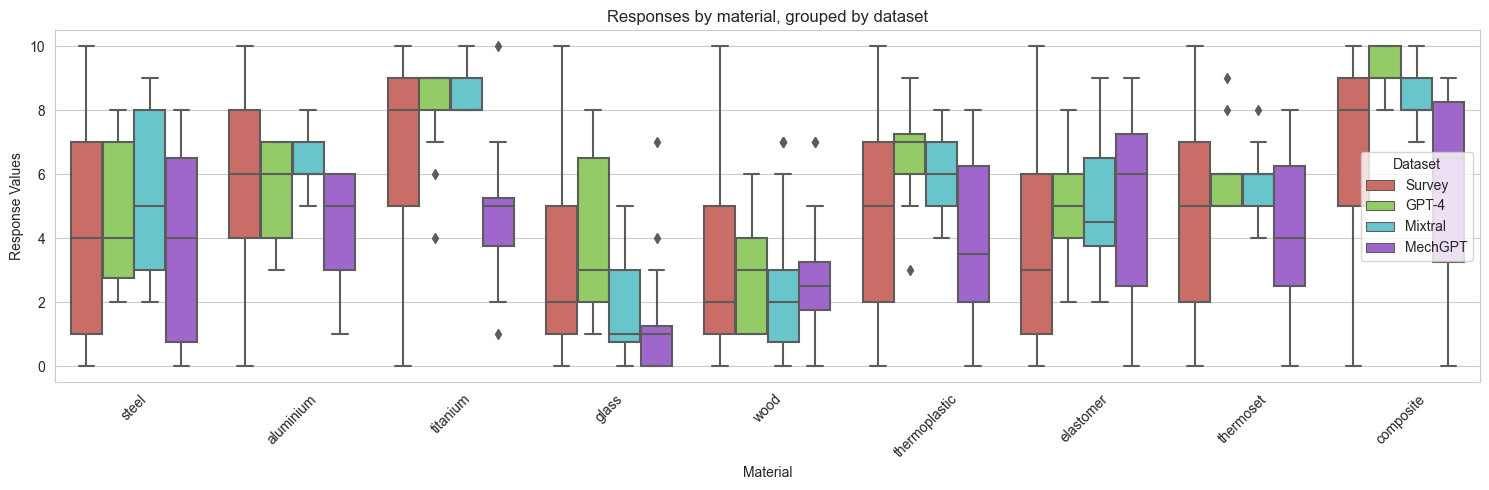

In [102]:
gpt4 = pd.read_csv('../generation/answers/parallel_gpt-4-0125-preview.csv')
mixtral = pd.read_csv('../generation/answers/parallel_mixtral.csv')
melm = pd.read_csv('../generation/answers/parallel_melm.csv')
survey = pd.read_csv('../data/survey_responses_mapped.csv')

# Add an identifier column to each dataset
gpt4['Dataset'] = 'GPT-4'
mixtral['Dataset'] = 'Mixtral'
melm['Dataset'] = 'MechGPT'
survey['Dataset'] = 'Survey'

# Combine the datasets
combined_df = pd.concat([survey, gpt4, mixtral, melm])

# make 'response' column numeric, if it's cannot be converted to numeric, it will be NaN
combined_df['response'] = pd.to_numeric(combined_df['response'], errors='coerce')

# count nans
print(combined_df['response'].isna().sum())

# Recreate the box and whisker plot with updated dataset names and excluding outliers
plt.figure(figsize=(15, 5))
sns.boxplot(data=combined_df, x='material', y='response', hue='Dataset',
            palette='hls')  #, showfliers=False)

plt.title('Responses by material, grouped by dataset')
plt.ylabel('Response Values')
plt.xlabel('Material')
plt.legend(title='Dataset')
plt.xticks(rotation=45)
# save figure without cropping the labels
plt.tight_layout()
# plt.savefig('responses_by_material_grouped_by_dataset.pdf')
plt.show()


## Plotting NaN responses

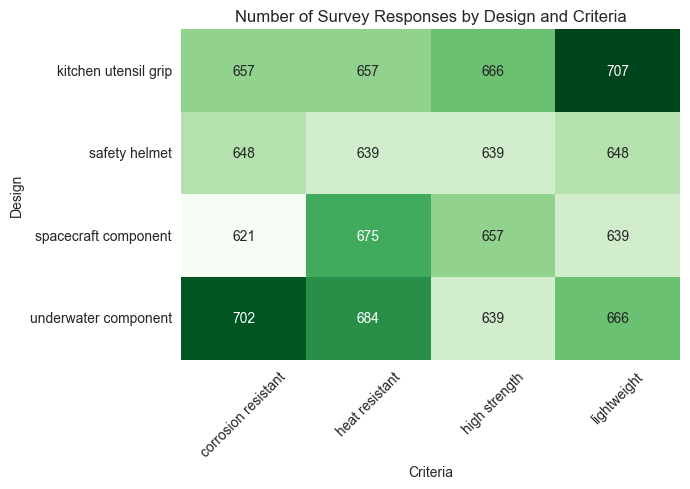

In [103]:
# Load the CSV file
file_path = '../data/survey_responses_mapped.csv'
data = pd.read_csv(file_path)

# Removing rows where 'response' column has NaN values before grouping
cleaned_data = data.dropna(subset=['response'])

# Grouping the cleaned data by 'design' and 'criteria', and counting the number of responses in each group
grouped_cleaned_data = cleaned_data.groupby(['design', 'criteria']).size().reset_index(name='counts')

# Creating a pivot table for better visualization
pivot_table_cleaned = grouped_cleaned_data.pivot(index="design", columns="criteria", values="counts")

# Plotting
plt.figure(figsize=(7, 5))
sns.heatmap(pivot_table_cleaned, annot=True, cmap="Greens", fmt="d", cbar=False)
plt.title('Number of Survey Responses by Design and Criteria')
plt.ylabel('Design')
plt.xlabel('Criteria')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()


plt.savefig('figures/responses_by_design_and_criteria_excluding_nan.pdf')

plt.show()

In [104]:
# sum counts
pivot_table_cleaned.sum().sum()

10544

## Design vs. Criteria grouped by model for zero-shot

In [78]:
from matplotlib.patches import Patch

data_path = 'mean_distances_per_design_criteria.csv'
data = pd.read_csv(data_path)

C:\Users\grandid\AppData\Local\Temp\1\ipykernel_12752\1578372120.py:50: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


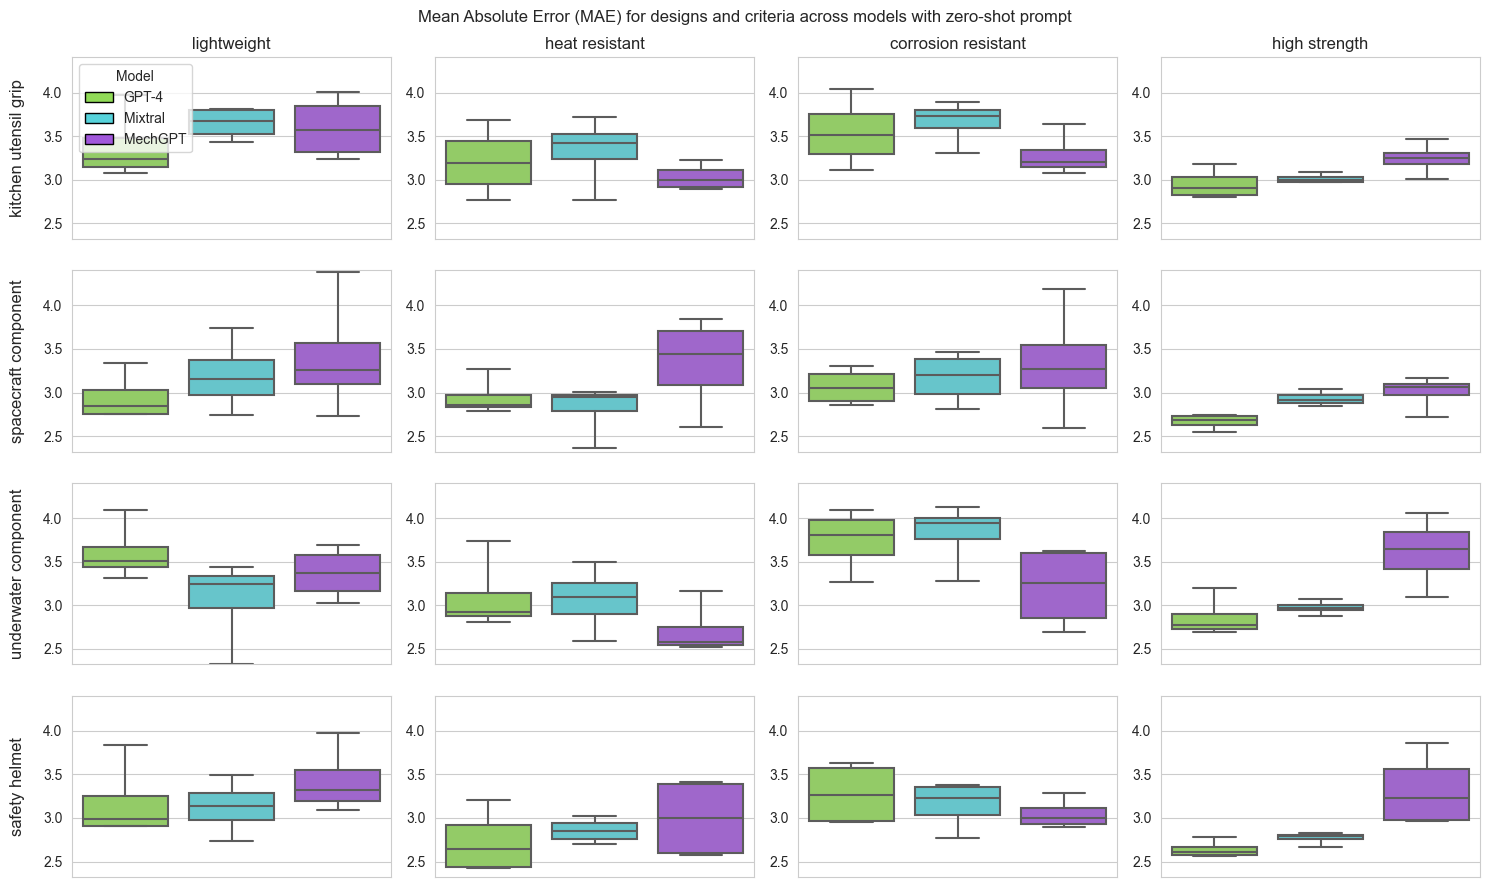

In [79]:
min_mean_distance = data['mean_distances'].min()
max_mean_distance = data['mean_distances'].max()

fig, axs = plt.subplots(4, 4, figsize=(15, 9), constrained_layout=True)
axs = axs.flatten()  # Flatten for easy indexing

palette = sns.color_palette("hls", 4)[1:]  # Skipping the first color


unique_design_criteria = data[['design', 'criteria']].drop_duplicates()

# Iterate over each unique combination of design and criteria to plot them
for i, (design, criteria) in enumerate(unique_design_criteria.itertuples(index=False)):
    # Filter data for the current design and criteria
    df_filtered = data[(data['design'] == design) & (data['criteria'] == criteria)]

    # Plot boxplot of scores grouped by 'source'
    sns.boxplot(ax=axs[i], x='model', y='mean_distances', data=df_filtered,
            palette=palette,
            showfliers=False,
            whis=(0, 100))
    if i < 4:
        axs[i].set_title(f'{criteria}')
    axs[i].set_xlabel('')
    axs[i].set_ylabel('')
    axs[i].set_xticklabels([])
    axs[i].set_ylim(min_mean_distance, max_mean_distance+0.02)

# add a legend
custom_handles = [Patch(facecolor=palette[0], edgecolor='black', label='GPT-4'),
                  Patch(facecolor=palette[1], edgecolor='black', label='Mixtral'),
                  Patch(facecolor=palette[2], edgecolor='black', label='MechGPT')]

axs[0].legend(handles=custom_handles, labels=['GPT-4', 'Mixtral', 'MechGPT'], title='Model', loc='upper left')


# remove ylabels for all but the first column
# for ax in [axs[1],axs[2],axs[3],axs[5],axs[6],axs[7],axs[9],axs[10],axs[11],axs[13],axs[14],axs[15]]:
#     ax.set_ylabel('')

# add a title
plt.suptitle("Mean Absolute Error (MAE) for designs and criteria across models with zero-shot prompt") #, y=1.03) #fontsize=16,

# Set the super titles for rows and columns
unique_designs = data['design'].unique()
for ax, design in zip([axs[0], axs[4], axs[8], axs[12]], unique_designs):
    ax.annotate(design, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - 5, 0),
                xycoords=ax.yaxis.label, textcoords='offset points',
                size='large', ha='right', va='center', rotation=90)
plt.tight_layout()

# save
plt.savefig('figures/mean_distances_per_design_criteria_grouped_by_model.pdf')

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\grandid\AppData\Local\Temp\1\ipykernel_12752\2713853020.py:42: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


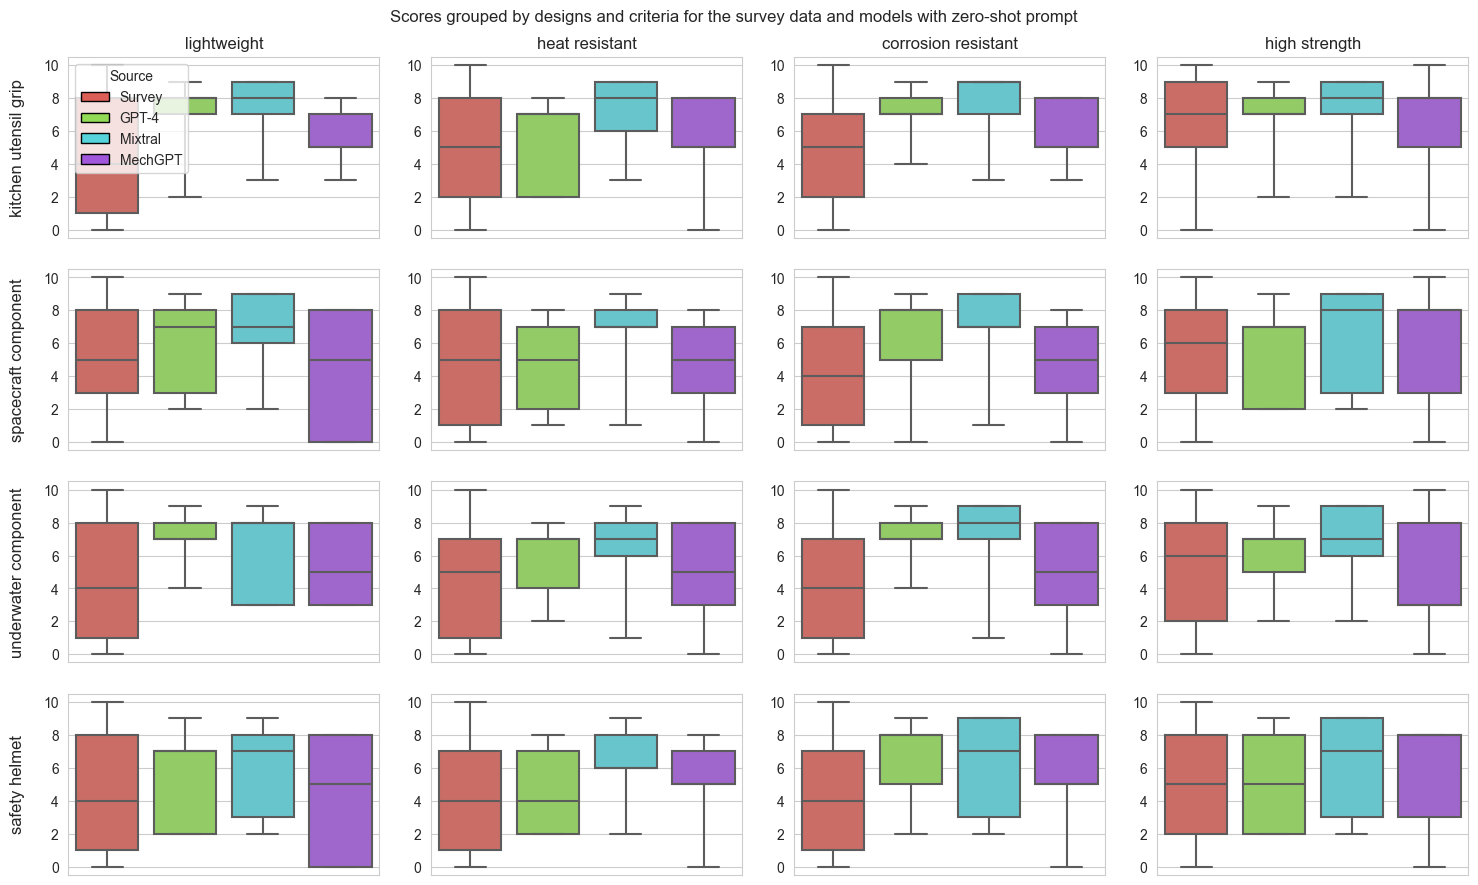

In [77]:
fig, axs = plt.subplots(4, 4, figsize=(15, 9), constrained_layout=True)
axs = axs.flatten()  # Flatten for easy indexing

unique_design_criteria = data[['design', 'criteria']].drop_duplicates()

# Iterate over each unique combination of design and criteria to plot them
for i, (design, criteria) in enumerate(unique_design_criteria.itertuples(index=False)):
    # Filter data for the current design and criteria
    df_filtered = combined_df[(combined_df['design'] == design) & (combined_df['criteria'] == criteria)]

    # Plot boxplot of scores grouped by 'source'
    sns.boxplot(ax=axs[i], x='Dataset', y='response', data=df_filtered,
            palette='hls',
            showfliers=False,
            whis=(0, 100))
    if i < 4:
        axs[i].set_title(f'{criteria}')
    axs[i].set_xlabel('')
    axs[i].set_ylabel('')
    axs[i].set_xticklabels([])

# add a legend
axs[0].legend(title='Source', loc='upper left')
palette = sns.color_palette("hls", 4)  # Skipping the first color

custom_handles = [Patch(facecolor=palette[0], edgecolor='black', label='Survey'),
                  Patch(facecolor=palette[1], edgecolor='black', label='GPT-4'),
                  Patch(facecolor=palette[2], edgecolor='black', label='Mixtral'),
                  Patch(facecolor=palette[3], edgecolor='black', label='MechGPT')
                  ]
axs[0].legend(handles=custom_handles, labels=['Survey', 'GPT-4', 'Mixtral', 'MechGPT'], title='Source', loc='upper left')

# add a title
plt.suptitle("Scores grouped by designs and criteria for the survey data and models with zero-shot prompt") #, y=1.03) #fontsize=16,

# Set the super titles for rows and columns
unique_designs = data['design'].unique()
for ax, design in zip([axs[0], axs[4], axs[8], axs[12]], unique_designs):
    ax.annotate(design, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - 5, 0),
                xycoords=ax.yaxis.label, textcoords='offset points',
                size='large', ha='right', va='center', rotation=90)
plt.tight_layout()

# save
plt.savefig('figures/results_per_design_criteria_grouped_by_model.pdf')

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\grandid\AppData\Local\Temp\1\ipykernel_12752\585598318.py:44: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


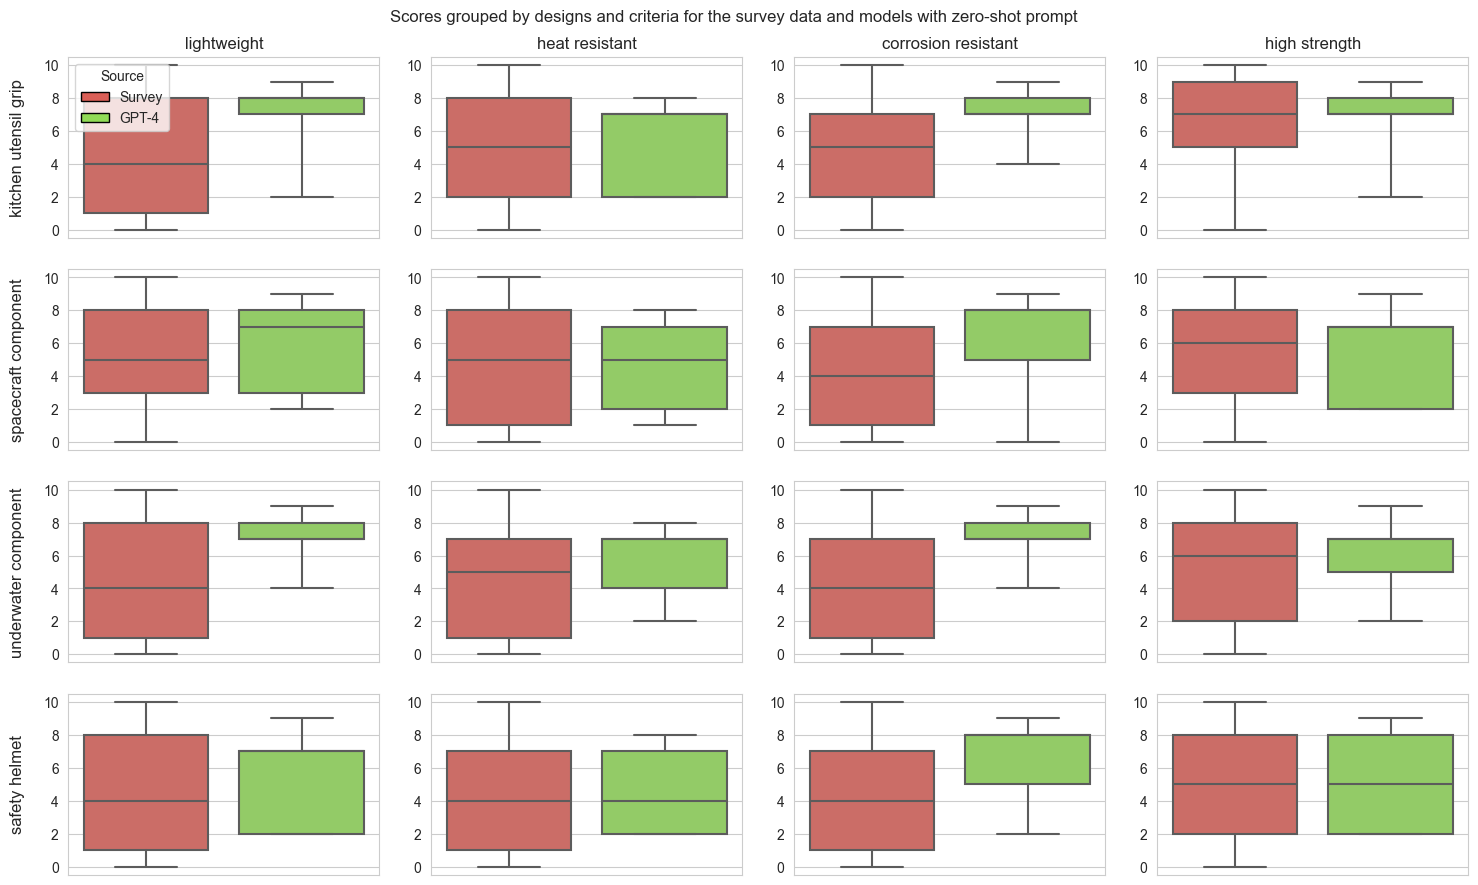

In [85]:
fig, axs = plt.subplots(4, 4, figsize=(15, 9), constrained_layout=True)
axs = axs.flatten()  # Flatten for easy indexing

unique_design_criteria = data[['design', 'criteria']].drop_duplicates()
palette = sns.color_palette("hls", 4)  # Skipping the first color


# filter data to include only survey and gpt-4
combined_df3 = combined_df[combined_df['Dataset'].isin(['Survey', 'GPT-4'])]

# Iterate over each unique combination of design and criteria to plot them
for i, (design, criteria) in enumerate(unique_design_criteria.itertuples(index=False)):
    # Filter data for the current design and criteria
    df_filtered = combined_df3[(combined_df3['design'] == design) & (combined_df3['criteria'] == criteria)]

    # Plot boxplot of scores grouped by 'source'
    sns.boxplot(ax=axs[i], x='Dataset', y='response', data=df_filtered,
            palette=palette,
            showfliers=False,
            whis=(0, 100))
    if i < 4:
        axs[i].set_title(f'{criteria}')
    axs[i].set_xlabel('')
    axs[i].set_ylabel('')
    axs[i].set_xticklabels([])

# add a legend
axs[0].legend(title='Source', loc='upper left')

custom_handles = [Patch(facecolor=palette[0], edgecolor='black', label='Survey'),
                  Patch(facecolor=palette[1], edgecolor='black', label='GPT-4'),
                  ]
axs[0].legend(handles=custom_handles, labels=['Survey', 'GPT-4'], title='Source', loc='upper left')

# add a title
plt.suptitle("Scores grouped by designs and criteria for the survey data and models with zero-shot prompt") #, y=1.03) #fontsize=16,

# Set the super titles for rows and columns
unique_designs = data['design'].unique()
for ax, design in zip([axs[0], axs[4], axs[8], axs[12]], unique_designs):
    ax.annotate(design, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - 5, 0),
                xycoords=ax.yaxis.label, textcoords='offset points',
                size='large', ha='right', va='center', rotation=90)
plt.tight_layout()

# save
# plt.savefig('figures/results_per_design_criteria_grouped_by_model.pdf')

plt.show()